In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['ps.fonttype']=42

import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

import scanpy as sc
import anndata as ad

/Users/yuanzan/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.cluster import hierarchy
from scipy.spatial import distance
from collections import defaultdict


def create_hc(G):
    """Creates hierarchical cluster of graph G from distance matrix"""
    path_length = nx.all_pairs_shortest_path_length(G)
    distances = np.zeros((len(G), len(G)))
    for u, p in path_length:
        for v, d in p.items():
            distances[u][v] = d
    # Create hierarchical cluster
    Y = distance.squareform(distances)
    Z = hierarchy.complete(Y)  # Creates HC using farthest point linkage
    # This partition selection is arbitrary, for illustrive purposes
    membership = list(hierarchy.fcluster(Z, t=1.15))
    # Create collection of lists for blockmodel
    partition = defaultdict(list)
    for n, p in zip(list(range(len(G))), membership):
        partition[p].append(n)
    return list(partition.values())

In [3]:
adata = ad.read_h5ad("CC_DD_Exp_energy_sugar.h5ad")

In [4]:
grnboost = pd.read_table("gene_energy_sugar_grnboost2.csv", sep="\t")

In [77]:
adata.var

,type
novel.1295,gene
novel.1358,gene
novel.1445,gene
novel.6315,gene
novel.6318,gene
...,...
Glu,sugar
Inositol,sugar
Rha,sugar
Sorbitol,sugar


In [78]:
grnboost["TF_type"] = adata.var.loc[grnboost["TF"], "type"].to_list()
grnboost["target_type"] = adata.var.loc[grnboost["target"], "type"].to_list()

In [82]:
grnboost.to_csv("gene_energy_sugar_grnboost2_addtype.csv", sep="\t",  index=False)

In [81]:
grnboost.head()

,TF,target,importance,cc,TF_type,target_type
0,Glu,Fru,116.171872,1,sugar,sugar
1,Phosphorylethanolamine,Solyc11g007330.2,90.087377,1,energy,gene
2,D-Glucose-6-phosphate,D-Erythrose-4-phosphate,87.627098,1,energy,energy
3,Gal,novel.6101,84.876482,1,sugar,gene
4,ADP,ATP,82.078663,1,energy,energy


<AxesSubplot: ylabel='Density'>

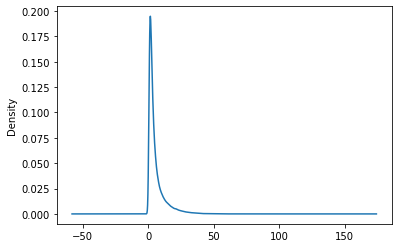

In [65]:
grnboost['importance'].plot.density()

In [31]:
grnboost['cc'] = 1
grnboost.shape

(403309, 4)

In [95]:
sub = grnboost.query('importance>=35')
sub.shape

(2850, 6)

In [96]:
sub.groupby(["TF"]).sum()['cc']

<ipython-input-96-7b59537c874b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub.groupby(["TF"]).sum()['cc']


TF
2-Phospho-D-glycerate          10
6-Phosphogluconate-acid         3
ADP                           103
AMP                            13
ATP                           151
Acetyl-CoA                    151
Adenine                         9
Alpha-Ketoglutaric-acid         1
Ara                            14
Beta-Leucine                   21
Citric-acid                   122
D-Erythrose-4-phosphate        16
D-Glucose-1-phosphate          19
D-Glucose-6-phosphate          10
D-Glutamine                     3
D-Ribulose-5-phosphate          8
Dihydroxyacetone-phosphate     14
Fru                            25
Fructose-1,6-bisphosphate       2
Fuc                             4
Gal                            50
Glu                             1
Glycerol-3-phosphate           11
IMP                             5
Inositol                        2
Isocitric-acid                  3
L-Alanine                      50
L-Arginine                     19
L-Asparagine                   44
L-Citrullin

In [90]:
sub.query('TF=="Acetyl-CoA"')

,TF,target,importance,cc,TF_type,target_type
100,Acetyl-CoA,Solyc03g044190.3,60.176854,1,energy,gene
165,Acetyl-CoA,ATP,56.734989,1,energy,energy
227,Acetyl-CoA,Solyc07g063520.3,54.424831,1,energy,gene
310,Acetyl-CoA,Solyc05g008400.4,51.974040,1,energy,gene
324,Acetyl-CoA,Solyc06g066420.4,51.664079,1,energy,gene
...,...,...,...,...,...,...
10072,Acetyl-CoA,Solyc04g077120.4,25.032266,1,energy,gene
10079,Acetyl-CoA,Solyc09g007870.3,25.025567,1,energy,gene
10083,Acetyl-CoA,Solyc02g081210.3,25.023172,1,energy,gene
10098,Acetyl-CoA,Solyc08g060925.1,25.009462,1,energy,gene


In [25]:
sub.query('TF=="Glu"')

,TF,target,importance
0,Glu,Fru,116.171872
3734,Glu,Fuc,32.904013
10766,Glu,Solyc12g011033.1,24.490848
12075,Glu,Solyc09g014580.3,23.538290
14254,Glu,Solyc05g046030.4,22.183185
15718,Glu,Solyc12g011037.1,21.407015
16393,Glu,Solyc07g026650.3,21.091767
18131,Glu,Solyc07g007350.1,20.255390


In [28]:
sub["TF"].unique()

array(['Glu', 'Phosphorylethanolamine', 'D-Glucose-6-phosphate', 'Gal',
       'ADP', 'L-Tyrosine', 'Phosphoenolpyruvic-acid',
       'D-Erythrose-4-phosphate', 'Suc', 'Uracil',
       '2-Phospho-D-glycerate', 'Citric-acid', 'D-Glucose-1-phosphate',
       'AMP', 'Lysine', 'Acetyl-CoA', 'Beta-Leucine', 'L-Arginine',
       'L-Glutamate', 'Sedoheptulose-7-phosphate', 'L-Asparagine',
       'L-Threonine', 'L-Alanine', 'Succinic-acid', 'ATP', 'Fru',
       'Ornithine', 'Rha', 'Pyruvic-acid', 'UDP-GlcNAc', 'cyclic-AMP',
       'UMP', 'D-Ribulose-5-phosphate', 'IMP', 'D-Glutamine', 'L-Lactate',
       '6-Phosphogluconate-acid', 'Dihydroxyacetone-phosphate', 'Ara',
       'Inositol', 'Glycerol-3-phosphate', 'Fuc', 'Adenine',
       'Isocitric-acid', 'L-Citrulline', 'Sorbitol',
       'Fructose-1,6-bisphosphate', 'L-Serine', 'Alpha-Ketoglutaric-acid',
       'Guanosine', 'FMN'], dtype=object)

In [30]:
len(sub["target"].unique())

6570

In [58]:
from networkx.algorithms import bipartite
G = nx.path_graph(4)
G.add_nodes_from([0, 2], bipartite=0, weight=1)
G.add_nodes_from([1, 3], bipartite=1, weight=3)
bipartite.write_edgelist(G, "test.edgelist")
G = bipartite.read_edgelist("test.edgelist")

fh = open("test.edgelist", "rb")

fh.close()

In [60]:
G = nx.read_edgelist("test.edgelist", nodetype=int)
H = G.subgraph(next(nx.connected_components(G)))

In [61]:
partitions = create_hc(H)
# Build blockmodel graph
BM = nx.quotient_graph(H, partitions, relabel=True)

# Draw original graph
pos = nx.spring_layout(H, iterations=100, seed=83) 



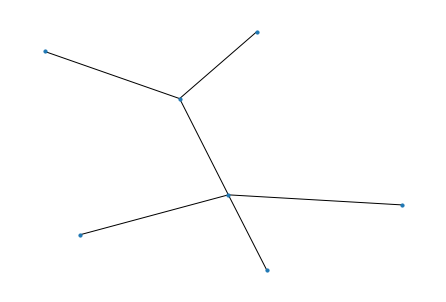

In [62]:
nx.draw(H, pos, with_labels=False, node_size=10)